In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Load the dataset
dunking_data = pd.read_csv('dunking-data.csv')

# Display the first few rows of the dataset
print(dunking_data.head())

      gamma       phi       eta         L          t    biscuit
0  0.073897  1.333006  0.000999  0.011196  19.362214  Digestive
1  0.080946  1.476758  0.001012  0.005894  11.852589  Digestive
2  0.087408  1.477141  0.000984  0.009249  24.793669  Digestive
3  0.070793  1.502001  0.001002  0.003774  16.292780     Hobnob
4  0.058917  1.548274  0.001004  0.002291  13.662271     Hobnob


In [3]:
# Split the data into features (X) and target variable (y)
X = dunking_data[['gamma', 'phi', 'eta', 'L', 't']]
y = dunking_data['biscuit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [5]:
# Predict the biscuit types for the test data
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of the Random Forest classifier:', accuracy)

Accuracy of the Random Forest classifier: 0.7716666666666666


### Evaluation

In [6]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

In [8]:
print(f"F1 score for the training set is: {f1_score(y_train, y_train_pred,average=None)}")
print(f"F1 score for the test set is: {f1_score(y_test, y_test_pred,average=None)}")
print(f"Confusion matrix for reference for train:\n {conf_matrix_train}")
print(f"Confusion matrix for reference for test:\n {conf_matrix_test}")

F1 score for the training set is: [1. 1. 1.]
F1 score for the test set is: [0.83538084 0.67475728 0.80839895]
Confusion matrix for reference for train:
 [[796   0   0]
 [  0 797   0]
 [  0   0 807]]
Confusion matrix for reference for test:
 [[170  31   3]
 [ 33 139  31]
 [  0  39 154]]


#### make a list of classes

In [9]:
classes = np.unique(np.concatenate((y_test, y_pred), axis=None))
classes

array(['Digestive', 'Hobnob', 'Rich Tea'], dtype=object)

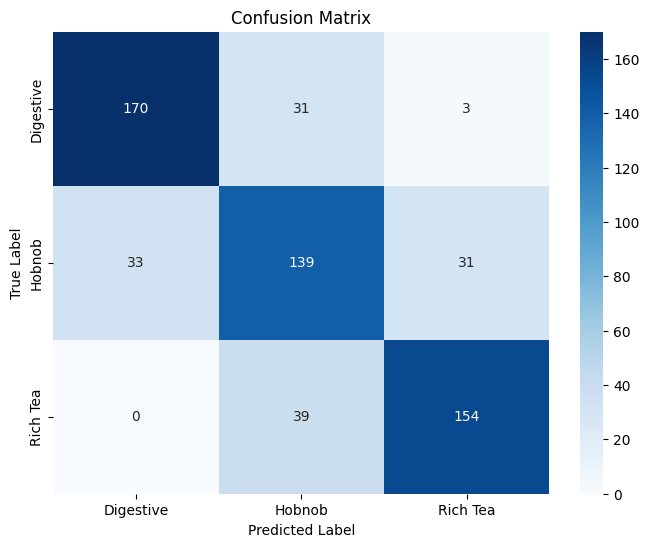

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Check for class imbalance

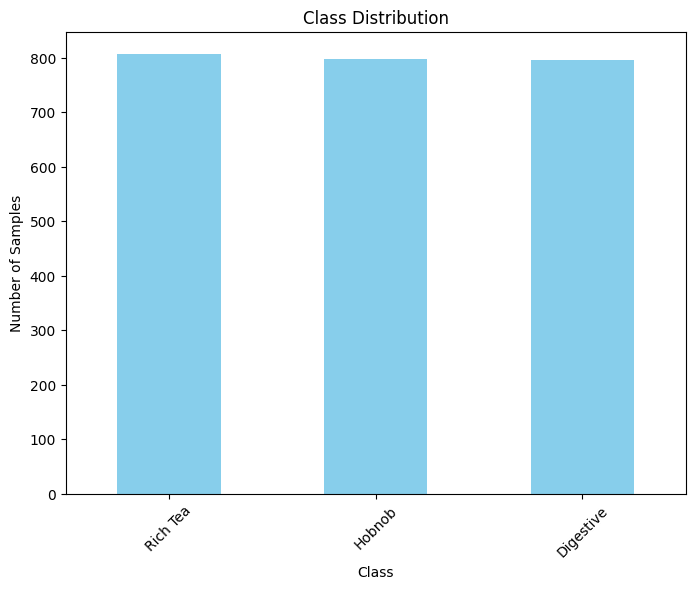

Class Distribution:
Rich Tea     807
Hobnob       797
Digestive    796
Name: biscuit, dtype: int64


In [11]:
# Convert y_train to a pandas Series for easier manipulation
y_train_series = pd.Series(y_train)

# Calculate class distribution
class_distribution = y_train_series.value_counts()

# Plot class distribution
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.show()

# Print class distribution (optional)
print("Class Distribution:")
print(class_distribution)

As classes are balanced, and each class is important we can use macro average for f1-score

In [12]:
print(f"F1 score for the training set is: {f1_score(y_train, y_train_pred, average='macro'):.3f}")
print(f"F1 score for the test set is: {f1_score(y_test, y_test_pred, average='macro'):.3f}")
print(f"Confusion matrix for reference for train:\n {conf_matrix_train}")
print(f"Confusion matrix for reference for test:\n {conf_matrix_test}")

F1 score for the training set is: 1.000
F1 score for the test set is: 0.773
Confusion matrix for reference for train:
 [[796   0   0]
 [  0 797   0]
 [  0   0 807]]
Confusion matrix for reference for test:
 [[170  31   3]
 [ 33 139  31]
 [  0  39 154]]


In [13]:
microscopy_data = pd.read_csv('microscopy-data.csv')

In [14]:
microscopy_data.head()

,gamma,phi,eta,L,t,r
0,0.084596,1.557367,0.000981,0.003221,24.231107,7.453712e-07
1,0.064291,1.538842,0.000998,0.002395,22.169765,2.600680e-07
2,0.086224,1.546138,0.001008,0.003036,23.257709,3.734618e-07
3,0.082859,1.566878,0.000997,0.001261,12.717432,7.567173e-07
4,0.090832,1.570229,0.001002,0.000576,15.189146,8.239067e-07


In [15]:
# Perform a merge based on common columns gamma, phi, and eta
merged_data = pd.merge(dunking_data, microscopy_data, on=['gamma', 'phi', 'eta'], how='left')

# Update the values of r in the merged dataframe
# Only update if gamma, phi, and eta match in both dataframes
merged_data['r'].fillna(microscopy_data['r'], inplace=True)

In [16]:
# Drop one of the duplicate columns (L_y)
merged_data.drop(columns=['L_y'], inplace=True)

# Rename the remaining duplicate column to remove the suffix (L_x to L)
merged_data.rename(columns={'L_x': 'L'}, inplace=True)

# Drop one of the duplicate columns (t_y)
merged_data.drop(columns=['t_y'], inplace=True)

# Rename the remaining duplicate column to remove the suffix (t_x to t)
merged_data.rename(columns={'t_x': 't'}, inplace=True)

In [17]:
merged_data.dropna(inplace=True)
merged_data

,gamma,phi,eta,L,t,biscuit,r
0,0.073897,1.333006,0.000999,0.011196,19.362214,Digestive,7.453712e-07
1,0.080946,1.476758,0.001012,0.005894,11.852589,Digestive,7.797961e-07
2,0.087408,1.477141,0.000984,0.009249,24.793669,Digestive,8.189772e-07
3,0.070793,1.502001,0.001002,0.003774,16.292780,Hobnob,7.567173e-07
4,0.058917,1.548274,0.001004,0.002291,13.662271,Hobnob,8.239067e-07
...,...,...,...,...,...,...,...
2987,0.070954,1.447903,0.000996,0.005560,17.524261,Hobnob,4.176549e-07
2989,0.060301,1.466961,0.001004,0.004119,17.604523,Rich Tea,3.187500e-07
2994,0.071658,1.303051,0.001003,0.008497,24.070251,Rich Tea,3.194081e-07
2995,0.084596,1.557367,0.000981,0.003221,24.231107,Digestive,7.453712e-07


### Save merged_data

In [18]:
merged_data.to_csv("merged-data.csv")

### Retrieve merged data

In [19]:
merged_data = pd.read_csv("merged-data.csv")

### Analyse biscuit pores

In [20]:
from scipy.stats import f_oneway

In [21]:
# Calculate average pore radius for each biscuit type
avg_pore_radius = merged_data.groupby('biscuit')['r'].mean()

In [22]:
# Statistical comparison using ANOVA
f_statistic, p_value = f_oneway(merged_data[merged_data['biscuit'] == 'Rich Tea']['r'],
                                merged_data[merged_data['biscuit'] == 'Hobnob']['r'],
                                merged_data[merged_data['biscuit'] == 'Digestive']['r'])

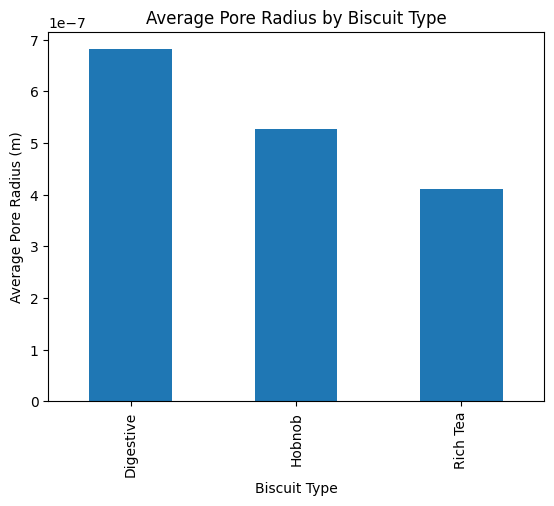

ANOVA F-Statistic: 164.3913765431994, p-value: 1.3087736569875434e-61


In [23]:
# Visualization
avg_pore_radius.plot(kind='bar', title='Average Pore Radius by Biscuit Type')
plt.xlabel('Biscuit Type')
plt.ylabel('Average Pore Radius (m)')
plt.show()

# Print statistical results
print(f'ANOVA F-Statistic: {f_statistic}, p-value: {p_value}')

## Train on the merged_data

In [24]:
# Split the data into features (X) and target variable (y)
X = merged_data[['gamma', 'phi', 'eta', 'L', 't','r']]
# X = merged_data[['gamma', 'phi', 'eta', 'L', 't']]
y = merged_data['biscuit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

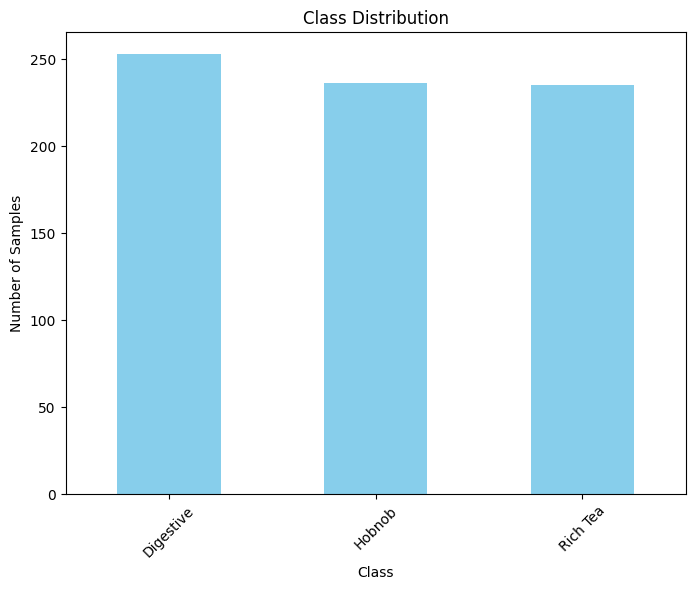

Class Distribution:
Digestive    253
Hobnob       236
Rich Tea     235
Name: biscuit, dtype: int64


In [25]:
# check for imbalance
# Convert y_train to a pandas Series for easier manipulation
y_train_series = pd.Series(y_train)

# Calculate class distribution
class_distribution = y_train_series.value_counts()

# Plot class distribution
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.show()

# Print class distribution (optional)
print("Class Distribution:")
print(class_distribution)

Even now the classes seem pretty much balanced.

In [26]:
# Initialize the Random Forest classifier
merged_rf_classifier = RandomForestClassifier()

# Train the classifier on the training data
merged_rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
# Predict the biscuit types for the test data
y_pred = merged_rf_classifier.predict(X_test)

# Calculate the accuracy of the model
merged_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of the Random Forest classifier:', merged_accuracy)

Accuracy of the Random Forest classifier: 0.7087912087912088


In [28]:
y_train_pred = merged_rf_classifier.predict(X_train)
y_test_pred = merged_rf_classifier.predict(X_test)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

In [29]:
print(f"F1 score for the training set is: {f1_score(y_train, y_train_pred, average='macro'):.3f}")
print(f"F1 score for the test set is: {f1_score(y_test, y_test_pred, average='macro'):.3f}")
print(f"Confusion matrix for reference for train:\n {conf_matrix_train}")
print(f"Confusion matrix for reference for test:\n {conf_matrix_test}")

F1 score for the training set is: 1.000
F1 score for the test set is: 0.705
Confusion matrix for reference for train:
 [[253   0   0]
 [  0 236   0]
 [  0   0 235]]
Confusion matrix for reference for test:
 [[39 11  2]
 [11 33 19]
 [ 0 10 57]]


Before merging these were the values: <br>
accuracy: 0.7816666666666666<br>
f1 score: 0.783<br>
when we merged the data, these were the values:<br>
accuracy: 0.7032967032967034<br>
f1 score: 0.697<br>

In [30]:
# Split the data into features (X) and target variable (y)
X = dunking_data[['gamma', 'phi', 'eta', 't']]
y = dunking_data['biscuit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Initialize the Random Forest classifier
rf1_classifier = RandomForestClassifier()

# Train the classifier on the training data
rf1_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
# Predict the biscuit types for the test data
y_pred = rf1_classifier.predict(X_test)

# Calculate the accuracy of the model
merged_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of the Random Forest classifier:', merged_accuracy)

Accuracy of the Random Forest classifier: 0.33166666666666667


Therefore, we cannot skip the L parameter.

In [33]:
# write a function that converts variables to washbrun parameter for merged_data dataframe
# apply it to dataframe and get values for each row
# get a range of washburn values for the three classes of biscuits
# use that range to write a function that inputs capillary radius and other paramters and outputs biscuit type

In [34]:
# compare function with machine learning

In [35]:
# Function to calculate capillary flow distance using Washburn equation
def calculate_capillary_flow_distance(row):
    gamma = row['gamma']
    r = row['r']  # Assuming 'r' is the pore radius in the dataset
    t = row['t']
    phi = row['phi']
    eta = row['eta']
    L = np.sqrt((gamma * r * t * np.cos(phi)) / (2 * eta))
    return L

# Apply the function to calculate capillary flow distance for each observation
merged_data['capillary_flow_distance'] = merged_data.apply(calculate_capillary_flow_distance, axis=1)

# Display the dataset with the calculated capillary flow distances
print(merged_data)

     Unnamed: 0     gamma       phi       eta         L          t    biscuit  \
0             0  0.073897  1.333006  0.000999  0.011196  19.362214  Digestive   
1             1  0.080946  1.476758  0.001012  0.005894  11.852589  Digestive   
2             2  0.087408  1.477141  0.000984  0.009249  24.793669  Digestive   
3             3  0.070793  1.502001  0.001002  0.003774  16.292780     Hobnob   
4             4  0.058917  1.548274  0.001004  0.002291  13.662271     Hobnob   
..          ...       ...       ...       ...       ...        ...        ...   
901        2987  0.070954  1.447903  0.000996  0.005560  17.524261     Hobnob   
902        2989  0.060301  1.466961  0.001004  0.004119  17.604523   Rich Tea   
903        2994  0.071658  1.303051  0.001003  0.008497  24.070251   Rich Tea   
904        2995  0.084596  1.557367  0.000981  0.003221  24.231107  Digestive   
905        2998  0.071386  1.212213  0.001004  0.013988  22.772293  Digestive   

                r  capillar

In [36]:
# Group the dataframe by the 'biscuit' column and calculate the range of 'capillary_flow_distance' for each group
range_values_L = merged_data.groupby('biscuit')['capillary_flow_distance'].agg(['min', 'max'])

# Print the range of values for each type of biscuit
print("Range of Capillary Flow Distance for Each Type of Biscuit:")
print(range_values_L)

Range of Capillary Flow Distance for Each Type of Biscuit:
                min       max
biscuit                      
Digestive  0.000567  0.018947
Hobnob     0.000485  0.018567
Rich Tea   0.000594  0.015718


In [37]:
# Group the dataframe by the 'biscuit' column and calculate the range of 'capillary_flow_distance' for each group
range_values_gamma = merged_data.groupby('biscuit')['gamma'].agg(['min', 'max'])

# Print the range of values for each type of biscuit
print("Range of gamma values for Each Type of Biscuit:")
print(range_values_gamma)

Range of gamma values for Each Type of Biscuit:
                min       max
biscuit                      
Digestive  0.047944  0.100620
Hobnob     0.040328  0.100099
Rich Tea   0.043428  0.103439


In [38]:
# Group the dataframe by the 'biscuit' column and calculate the range of 'capillary_flow_distance' for each group
range_values_phi = merged_data.groupby('biscuit')['phi'].agg(['min', 'max'])

# Print the range of values for each type of biscuit
print("Range of phi values for Each Type of Biscuit:")
print(range_values_phi)

Range of phi values for Each Type of Biscuit:
                min       max
biscuit                      
Digestive  1.122808  1.570229
Hobnob     1.072712  1.570269
Rich Tea   1.083508  1.568699


In [39]:
# Group the dataframe by the 'biscuit' column and calculate the range of 'capillary_flow_distance' for each group
range_values_eta = merged_data.groupby('biscuit')['eta'].agg(['min', 'max'])

# Print the range of values for each type of biscuit
print("Range of eta values for Each Type of Biscuit:")
print(range_values_eta)

Range of eta values for Each Type of Biscuit:
                min       max
biscuit                      
Digestive  0.000971  0.001034
Hobnob     0.000972  0.001023
Rich Tea   0.000973  0.001031


In [40]:
# Group the dataframe by the 'biscuit' column and calculate the range of 'capillary_flow_distance' for each group
range_values_r = merged_data.groupby('biscuit')['r'].agg(['min', 'max'])

# Print the range of values for each type of biscuit
print("Range of Radii for Each Type of Biscuit:")
print(range_values_r)

Range of Radii for Each Type of Biscuit:
                    min           max
biscuit                              
Digestive  1.942158e-07  8.991764e-07
Hobnob     1.816135e-07  8.991764e-07
Rich Tea   1.562959e-07  8.809701e-07


In [41]:
# function to implement washburn to find out biscuit type
# Function to calculate capillary flow distance using Washburn equation
def calculate_capillary_flow_distance(gamma, r, t, phi, eta):
    L = (gamma * r * t * np.cos(phi)) / (2 * eta)
    return L

# Function to determine biscuit type based on capillary flow distance
def get_biscuit_type(r, gamma, t, phi, eta):
    # Calculate capillary flow distance
    flow_distance = calculate_capillary_flow_distance(gamma, r, t, phi, eta)
    
    # Determine biscuit type based on flow distance
    if flow_distance < 10:
        return 'Digestive'
    elif flow_distance < 20:
        return 'Hobnob'
    else:
        return 'Rich Tea'

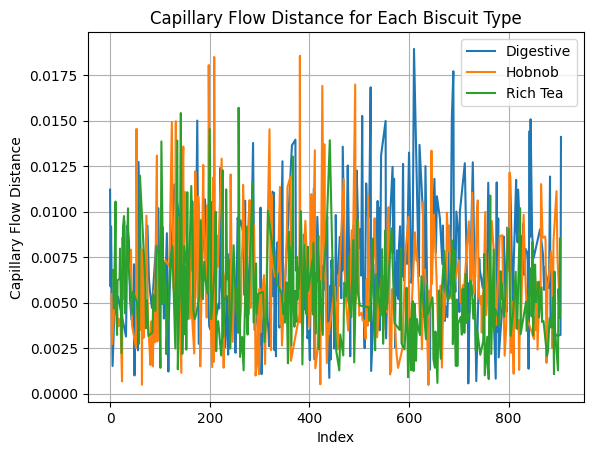

In [42]:
# Filter dataframe for each biscuit type
digestive_data = merged_data[merged_data['biscuit'] == 'Digestive']
hobnob_data = merged_data[merged_data['biscuit'] == 'Hobnob']
rich_tea_data = merged_data[merged_data['biscuit'] == 'Rich Tea']

# Plot capillary flow distance for each biscuit type
plt.plot(digestive_data.index, digestive_data['capillary_flow_distance'], label='Digestive')
plt.plot(hobnob_data.index, hobnob_data['capillary_flow_distance'], label='Hobnob')
plt.plot(rich_tea_data.index, rich_tea_data['capillary_flow_distance'], label='Rich Tea')

# Add labels and legend
plt.xlabel('Index')
plt.ylabel('Capillary Flow Distance')
plt.title('Capillary Flow Distance for Each Biscuit Type')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

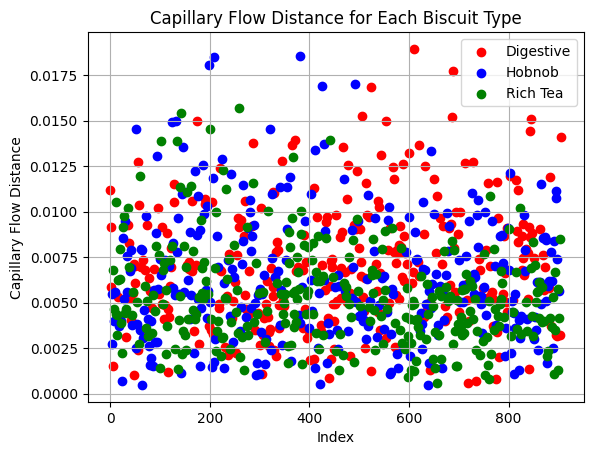

In [43]:
# Define colors for each biscuit type
colors = {'Digestive': 'red', 'Hobnob': 'blue', 'Rich Tea': 'green'}

# Plot capillary flow distance for each biscuit type
for biscuit, data in merged_data.groupby('biscuit'):
    plt.scatter(data.index, data['capillary_flow_distance'], label=biscuit, color=colors[biscuit])

# Add labels and legend
plt.xlabel('Index')
plt.ylabel('Capillary Flow Distance')
plt.title('Capillary Flow Distance for Each Biscuit Type')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

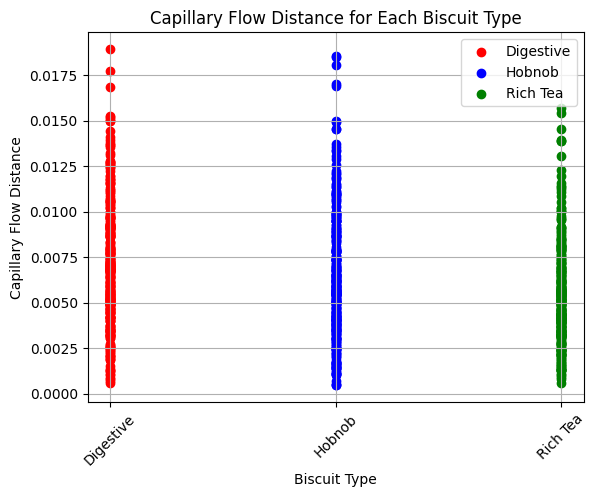

In [44]:
# Define colors for each biscuit type
colors = {'Digestive': 'red', 'Hobnob': 'blue', 'Rich Tea': 'green'}

# Plot capillary flow distance for each biscuit type
for biscuit, data in merged_data.groupby('biscuit'):
    plt.scatter([biscuit]*len(data), data['capillary_flow_distance'], label=biscuit, color=colors[biscuit])

# Set x-axis labels
plt.xticks(rotation=45)  # Rotate labels for better readability

# Add labels and legend
plt.xlabel('Biscuit Type')
plt.ylabel('Capillary Flow Distance')
plt.title('Capillary Flow Distance for Each Biscuit Type')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [45]:
# Function to calculate capillary flow distance using Washburn equation
def calculate_capillary_flow_distance(row):
    gamma = row['gamma']
    r = row['r']  # Assuming 'r' is the pore radius in the dataset
    t = row['t']
    phi = row['phi']
    eta = row['eta']
    L = np.sqrt((gamma * r * t * np.cos(phi)) / (2 * eta))
    return L

# Apply the function to calculate capillary flow distance for each observation
microscopy_data['capillary_flow_distance'] = microscopy_data.apply(calculate_capillary_flow_distance, axis=1)

# Display the dataset with the calculated capillary flow distances
print(microscopy_data)

        gamma       phi       eta         L          t             r  \
0    0.084596  1.557367  0.000981  0.003221  24.231107  7.453712e-07   
1    0.064291  1.538842  0.000998  0.002395  22.169765  2.600680e-07   
2    0.086224  1.546138  0.001008  0.003036  23.257709  3.734618e-07   
3    0.082859  1.566878  0.000997  0.001261  12.717432  7.567173e-07   
4    0.090832  1.570229  0.001002  0.000576  15.189146  8.239067e-07   
..        ...       ...       ...       ...        ...           ...   
495  0.077699  1.481847  0.000989  0.006078  21.967531  4.751893e-07   
496  0.067776  1.488293  0.001011  0.006595  18.163634  8.798032e-07   
497  0.074166  1.554817  0.000997  0.003041  18.000978  8.652230e-07   
498  0.081415  1.439910  0.001011  0.009119  19.136713  8.128785e-07   
499  0.086839  1.524417  0.001007  0.003018  11.393455  3.980807e-07   

     capillary_flow_distance  
0                   0.003233  
1                   0.002436  
2                   0.003027  
3          

I made a mistake in the formula lol. i forgot about the square root

In [46]:
dunking_data

,gamma,phi,eta,L,t,biscuit
0,0.073897,1.333006,0.000999,0.011196,19.362214,Digestive
1,0.080946,1.476758,0.001012,0.005894,11.852589,Digestive
2,0.087408,1.477141,0.000984,0.009249,24.793669,Digestive
3,0.070793,1.502001,0.001002,0.003774,16.292780,Hobnob
4,0.058917,1.548274,0.001004,0.002291,13.662271,Hobnob
...,...,...,...,...,...,...
2995,0.084596,1.557367,0.000981,0.003221,24.231107,Digestive
2996,0.067928,1.487239,0.000993,0.003933,12.256570,Hobnob
2997,0.059526,1.444489,0.000998,0.007583,26.464108,Hobnob
2998,0.071386,1.212213,0.001004,0.013988,22.772293,Digestive


We can use washburn equation to calculate the radius approximately.

In [47]:
def calculate_radius(row):
    gamma = row['gamma']
    L = row['L']  # Assuming 'L' is the length travelled up the biscuit
    t = row['t']
    phi = row['phi']
    eta = row['eta']
    r = (2 * (L * L) * eta)/(gamma * t * np.cos(phi))
    return r

# Apply the function to calculate pore radius for each observation
dunking_data['r'] = dunking_data.apply(calculate_radius, axis=1)

# Display the dataset with the calculated capillary flow distances
print(dunking_data)

         gamma       phi       eta         L          t    biscuit  \
0     0.073897  1.333006  0.000999  0.011196  19.362214  Digestive   
1     0.080946  1.476758  0.001012  0.005894  11.852589  Digestive   
2     0.087408  1.477141  0.000984  0.009249  24.793669  Digestive   
3     0.070793  1.502001  0.001002  0.003774  16.292780     Hobnob   
4     0.058917  1.548274  0.001004  0.002291  13.662271     Hobnob   
...        ...       ...       ...       ...        ...        ...   
2995  0.084596  1.557367  0.000981  0.003221  24.231107  Digestive   
2996  0.067928  1.487239  0.000993  0.003933  12.256570     Hobnob   
2997  0.059526  1.444489  0.000998  0.007583  26.464108     Hobnob   
2998  0.071386  1.212213  0.001004  0.013988  22.772293  Digestive   
2999  0.082724  1.482384  0.001000  0.003885  15.217883   Rich Tea   

                 r  
0     7.429094e-07  
1     7.803690e-07  
2     8.302559e-07  
3     3.598074e-07  
4     5.814437e-07  
...            ...  
2995  7.3962

In [48]:
merged_data

,Unnamed: 0,gamma,phi,eta,L,t,biscuit,r,capillary_flow_distance
0,0,0.073897,1.333006,0.000999,0.011196,19.362214,Digestive,7.453712e-07,0.011215
1,1,0.080946,1.476758,0.001012,0.005894,11.852589,Digestive,7.797961e-07,0.005892
2,2,0.087408,1.477141,0.000984,0.009249,24.793669,Digestive,8.189772e-07,0.009186
3,3,0.070793,1.502001,0.001002,0.003774,16.292780,Hobnob,7.567173e-07,0.005473
4,4,0.058917,1.548274,0.001004,0.002291,13.662271,Hobnob,8.239067e-07,0.002727
...,...,...,...,...,...,...,...,...,...
901,2987,0.070954,1.447903,0.000996,0.005560,17.524261,Hobnob,4.176549e-07,0.005654
902,2989,0.060301,1.466961,0.001004,0.004119,17.604523,Rich Tea,3.187500e-07,0.004179
903,2994,0.071658,1.303051,0.001003,0.008497,24.070251,Rich Tea,3.194081e-07,0.008523
904,2995,0.084596,1.557367,0.000981,0.003221,24.231107,Digestive,7.453712e-07,0.003233


In [49]:
# Split the data into features (X) and target variable (y)
X = dunking_data[['gamma', 'phi', 'eta', 'L', 't','r']]
y = dunking_data['biscuit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
# Predict the biscuit types for the test data
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of the Random Forest classifier:', accuracy)

Accuracy of the Random Forest classifier: 0.8733333333333333


In [52]:
y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

In [53]:
print(f"F1 score for the training set is: {f1_score(y_train, y_train_pred,average=None)}")
print(f"F1 score for the test set is: {f1_score(y_test, y_test_pred,average=None)}")
print(f"Confusion matrix for reference for train:\n {conf_matrix_train}")
print(f"Confusion matrix for reference for test:\n {conf_matrix_test}")

F1 score for the training set is: [1. 1. 1.]
F1 score for the test set is: [0.95942721 0.81       0.84514436]
Confusion matrix for reference for train:
 [[796   0   0]
 [  0 797   0]
 [  0   0 807]]
Confusion matrix for reference for test:
 [[201   3   0]
 [ 14 162  27]
 [  0  32 161]]


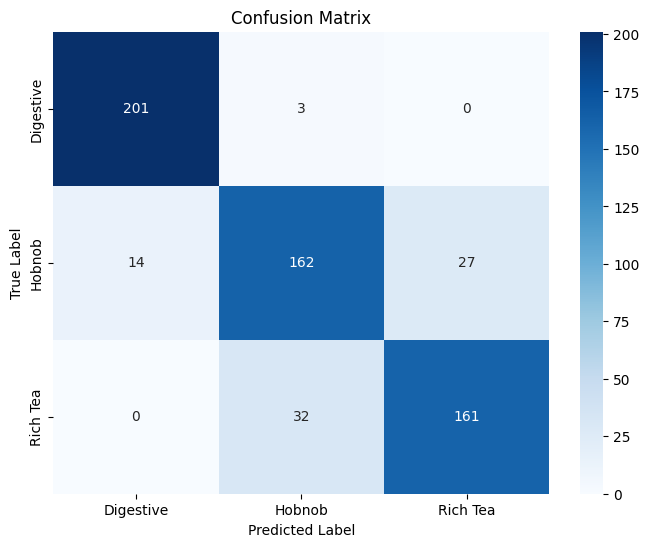

In [54]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [55]:
print(f"F1 score for the training set is: {f1_score(y_train, y_train_pred, average='macro'):.3f}")
print(f"F1 score for the test set is: {f1_score(y_test, y_test_pred, average='macro'):.3f}")
print(f"Confusion matrix for reference for train:\n {conf_matrix_train}")
print(f"Confusion matrix for reference for test:\n {conf_matrix_test}")

F1 score for the training set is: 1.000
F1 score for the test set is: 0.872
Confusion matrix for reference for train:
 [[796   0   0]
 [  0 797   0]
 [  0   0 807]]
Confusion matrix for reference for test:
 [[201   3   0]
 [ 14 162  27]
 [  0  32 161]]


Adding the radius improves the ML algorithm significantly

Before merging these were the values: <br>
accuracy: 0.7816666666666666<br>
f1 score: 0.783<br>
when we merged the data, these were the values:<br>
without r:<br>
accuracy: 0.7142857142857143<br>
f1 score: 0.709 <br>
with r:<br>
accuracy: 0.7032967032967034<br>
f1 score: 0.697<br>

After adding the radius these are the values: <br>
accuracy: 0.8816666666666667<br>
f1 score: 0.880

After merging the data, the accuracy and f1_score might have reduced probably because we had a smaller data set. Let's add dL and see if it affects the algorithm. But as we calculated the radius using the washburn equation and applied it to the whole of the data set, the accuracy increased

In [56]:
tr_1 =pd.read_csv('tr-1.csv')
tr_2 =pd.read_csv('tr-2.csv')
tr_3 =pd.read_csv('tr-3.csv')

In [57]:
combined_df = pd.concat([tr_1, tr_2, tr_3], ignore_index=True)

In [58]:
combined_df

,t,L,dL
0,30.000000,0.008087,0.000392
1,32.727273,0.008253,0.000270
2,35.454545,0.008607,0.000501
3,38.181818,0.008920,0.000267
4,40.909091,0.009604,0.000274
...,...,...,...
295,289.090909,0.034766,0.000118
296,291.818182,0.034769,0.000341
297,294.545455,0.034655,0.000155
298,297.272727,0.034646,0.000481


In [59]:
merged_data_dL = merged_data.merge(combined_df[['t', 'L', 'dL']], on=['t', 'L'], how='left')

In [60]:
merged_data_dL

,Unnamed: 0,gamma,phi,eta,L,t,biscuit,r,capillary_flow_distance,dL
0,0,0.073897,1.333006,0.000999,0.011196,19.362214,Digestive,7.453712e-07,0.011215,NaN
1,1,0.080946,1.476758,0.001012,0.005894,11.852589,Digestive,7.797961e-07,0.005892,NaN
2,2,0.087408,1.477141,0.000984,0.009249,24.793669,Digestive,8.189772e-07,0.009186,NaN
3,3,0.070793,1.502001,0.001002,0.003774,16.292780,Hobnob,7.567173e-07,0.005473,NaN
4,4,0.058917,1.548274,0.001004,0.002291,13.662271,Hobnob,8.239067e-07,0.002727,NaN
...,...,...,...,...,...,...,...,...,...,...
901,2987,0.070954,1.447903,0.000996,0.005560,17.524261,Hobnob,4.176549e-07,0.005654,NaN
902,2989,0.060301,1.466961,0.001004,0.004119,17.604523,Rich Tea,3.187500e-07,0.004179,NaN
903,2994,0.071658,1.303051,0.001003,0.008497,24.070251,Rich Tea,3.194081e-07,0.008523,NaN
904,2995,0.084596,1.557367,0.000981,0.003221,24.231107,Digestive,7.453712e-07,0.003233,NaN


In [61]:
merged_data_dL['dL'].value_counts()

Series([], Name: dL, dtype: int64)

In [62]:
# Drop rows with NaN values in the 'dL' column
merged_data_dL.dropna(subset=['dL'], inplace=True)

In [63]:
merged_data_dL

,Unnamed: 0,gamma,phi,eta,L,t,biscuit,r,capillary_flow_distance,dL


In [64]:
# Get the minimum and maximum values of the column t
min_value_t_md = merged_data['t'].min()
max_value_t_md = merged_data['t'].max()

print("Minimum value:", min_value_t_md)
print("Maximum value:", max_value_t_md)

Minimum value: 10.013910266897115
Maximum value: 29.97334631266186


In [65]:
# Get the minimum and maximum values of the column t
min_value_t_cd = combined_df['t'].min()
max_value_t_cd = combined_df['t'].max()

print("Minimum value:", min_value_t_cd)
print("Maximum value:", max_value_t_cd)

Minimum value: 30.0
Maximum value: 300.0


In [66]:
min_value_L_md = merged_data['L'].min()
max_value_L_md = merged_data['L'].max()

print("Minimum value:", min_value_L_md)
print("Maximum value:", max_value_L_md)

Minimum value: 0.0004827968726831
Maximum value: 0.0190089874303445


In [67]:
min_value_L_cd = combined_df['L'].min()
max_value_L_cd = combined_df['L'].max()

print("Minimum value:", min_value_L_cd)
print("Maximum value:", max_value_L_cd)

Minimum value: 0.0058090536903335
Maximum value: 0.0353732772157046


In [68]:
merged_data_dL = merged_data.merge(combined_df[['L', 'dL']], on=['L'], how='left')

In [69]:
merged_data_dL

,Unnamed: 0,gamma,phi,eta,L,t,biscuit,r,capillary_flow_distance,dL
0,0,0.073897,1.333006,0.000999,0.011196,19.362214,Digestive,7.453712e-07,0.011215,NaN
1,1,0.080946,1.476758,0.001012,0.005894,11.852589,Digestive,7.797961e-07,0.005892,NaN
2,2,0.087408,1.477141,0.000984,0.009249,24.793669,Digestive,8.189772e-07,0.009186,NaN
3,3,0.070793,1.502001,0.001002,0.003774,16.292780,Hobnob,7.567173e-07,0.005473,NaN
4,4,0.058917,1.548274,0.001004,0.002291,13.662271,Hobnob,8.239067e-07,0.002727,NaN
...,...,...,...,...,...,...,...,...,...,...
901,2987,0.070954,1.447903,0.000996,0.005560,17.524261,Hobnob,4.176549e-07,0.005654,NaN
902,2989,0.060301,1.466961,0.001004,0.004119,17.604523,Rich Tea,3.187500e-07,0.004179,NaN
903,2994,0.071658,1.303051,0.001003,0.008497,24.070251,Rich Tea,3.194081e-07,0.008523,NaN
904,2995,0.084596,1.557367,0.000981,0.003221,24.231107,Digestive,7.453712e-07,0.003233,NaN


In [70]:
# Drop rows with NaN values in the 'dL' column
merged_data_dL.dropna(subset=['dL'], inplace=True)

In [71]:
merged_data_dL

,Unnamed: 0,gamma,phi,eta,L,t,biscuit,r,capillary_flow_distance,dL


In [72]:
combined_df

,t,L,dL
0,30.000000,0.008087,0.000392
1,32.727273,0.008253,0.000270
2,35.454545,0.008607,0.000501
3,38.181818,0.008920,0.000267
4,40.909091,0.009604,0.000274
...,...,...,...
295,289.090909,0.034766,0.000118
296,291.818182,0.034769,0.000341
297,294.545455,0.034655,0.000155
298,297.272727,0.034646,0.000481


In [73]:
decimal_places = 4  # Change this value to the desired number of decimal places
combined_df['L'] = np.round(combined_df['L'], decimal_places)
combined_df

,t,L,dL
0,30.000000,0.0081,0.000392
1,32.727273,0.0083,0.000270
2,35.454545,0.0086,0.000501
3,38.181818,0.0089,0.000267
4,40.909091,0.0096,0.000274
...,...,...,...
295,289.090909,0.0348,0.000118
296,291.818182,0.0348,0.000341
297,294.545455,0.0347,0.000155
298,297.272727,0.0346,0.000481


In [74]:
dunking_data['L'] = np.round(dunking_data['L'], decimal_places)

In [75]:
merged_data_dL = dunking_data.merge(combined_df[['L', 'dL']], on=['L'], how='left')
merged_data_dL.dropna(subset=['dL'], inplace=True)
merged_data_dL

,gamma,phi,eta,L,t,biscuit,r,dL
0,0.073897,1.333006,0.000999,0.0112,19.362214,Digestive,7.429094e-07,0.000122
1,0.073897,1.333006,0.000999,0.0112,19.362214,Digestive,7.429094e-07,0.000503
2,0.073897,1.333006,0.000999,0.0112,19.362214,Digestive,7.429094e-07,0.000371
12,0.059020,1.454741,0.000991,0.0066,17.498606,Digestive,7.206872e-07,0.000323
13,0.077694,1.083508,0.000990,0.0101,14.124569,Rich Tea,3.963607e-07,0.000632
...,...,...,...,...,...,...,...,...
3333,0.072541,1.402620,0.000998,0.0100,22.181431,Digestive,7.371523e-07,0.000337
3334,0.062920,1.292001,0.000998,0.0102,25.452177,Hobnob,4.733453e-07,0.000290
3336,0.071473,1.337090,0.001002,0.0113,19.058221,Digestive,8.166526e-07,0.000286
3337,0.071473,1.337090,0.001002,0.0113,19.058221,Digestive,8.166526e-07,0.000468


In [76]:
# Reset the index of the DataFrame
merged_data_dL.reset_index(drop=True, inplace=True)
merged_data_dL

,gamma,phi,eta,L,t,biscuit,r,dL
0,0.073897,1.333006,0.000999,0.0112,19.362214,Digestive,7.429094e-07,0.000122
1,0.073897,1.333006,0.000999,0.0112,19.362214,Digestive,7.429094e-07,0.000503
2,0.073897,1.333006,0.000999,0.0112,19.362214,Digestive,7.429094e-07,0.000371
3,0.059020,1.454741,0.000991,0.0066,17.498606,Digestive,7.206872e-07,0.000323
4,0.077694,1.083508,0.000990,0.0101,14.124569,Rich Tea,3.963607e-07,0.000632
...,...,...,...,...,...,...,...,...
1221,0.072541,1.402620,0.000998,0.0100,22.181431,Digestive,7.371523e-07,0.000337
1222,0.062920,1.292001,0.000998,0.0102,25.452177,Hobnob,4.733453e-07,0.000290
1223,0.071473,1.337090,0.001002,0.0113,19.058221,Digestive,8.166526e-07,0.000286
1224,0.071473,1.337090,0.001002,0.0113,19.058221,Digestive,8.166526e-07,0.000468


In [77]:
# Split the data into features (X) and target variable (y)
X = merged_data_dL[['gamma', 'phi', 'eta', 'L', 't','r','dL']]
y = merged_data_dL['biscuit']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
# Initialize the Random Forest classifier
rf_classifier_dL = RandomForestClassifier()

# Train the classifier on the training data
rf_classifier_dL.fit(X_train, y_train)

RandomForestClassifier()

In [79]:
# Predict the biscuit types for the test data
y_pred = rf_classifier_dL.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of the Random Forest classifier:', accuracy)

Accuracy of the Random Forest classifier: 0.926829268292683


In [80]:
y_train_pred = rf_classifier_dL.predict(X_train)
y_test_pred = rf_classifier_dL.predict(X_test)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

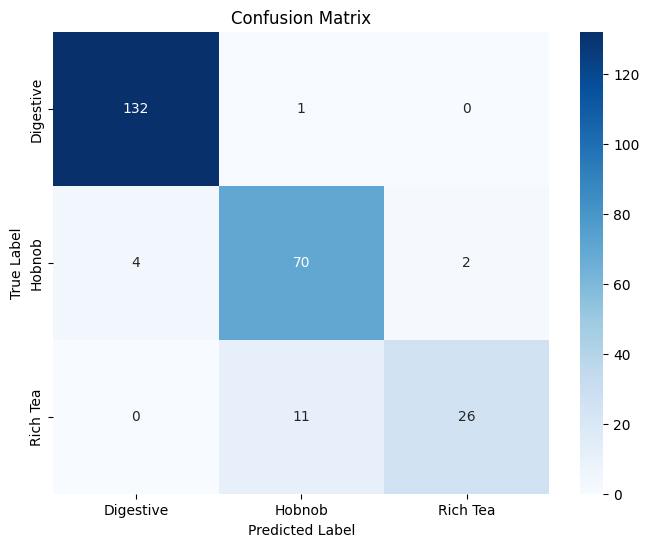

In [81]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [82]:
print(f"F1 score for the training set is: {f1_score(y_train, y_train_pred, average='macro'):.3f}")
print(f"F1 score for the test set is: {f1_score(y_test, y_test_pred, average='macro'):.3f}")
print(f"Confusion matrix for reference for train:\n {conf_matrix_train}")
print(f"Confusion matrix for reference for test:\n {conf_matrix_test}")
print('Accuracy of the Random Forest classifier:', accuracy)

F1 score for the training set is: 1.000
F1 score for the test set is: 0.889
Confusion matrix for reference for train:
 [[530   0   0]
 [  0 299   0]
 [  0   0 151]]
Confusion matrix for reference for test:
 [[132   1   0]
 [  4  70   2]
 [  0  11  26]]
Accuracy of the Random Forest classifier: 0.926829268292683


Adding the dL value makes it even better!

Comparing:<br>
Before merging these were the values: <br>
accuracy: 0.7816666666666666<br>
f1 score: 0.783<br>
when we merged the data, these were the values:<br>
without r:<br>
accuracy: 0.7142857142857143<br>
f1 score: 0.709 <br>
with r:<br>
accuracy: 0.7032967032967034<br>
f1 score: 0.697<br>
After adding the radius these are the values: <br>
accuracy: 0.8816666666666667<br>
f1 score: 0.880 <br>
After adding dL:<br>
accuracy: 0.9308943089430894<br> 
f1_score: 0.902

In [83]:
microscopy_data

,gamma,phi,eta,L,t,r,capillary_flow_distance
0,0.084596,1.557367,0.000981,0.003221,24.231107,7.453712e-07,0.003233
1,0.064291,1.538842,0.000998,0.002395,22.169765,2.600680e-07,0.002436
2,0.086224,1.546138,0.001008,0.003036,23.257709,3.734618e-07,0.003027
3,0.082859,1.566878,0.000997,0.001261,12.717432,7.567173e-07,0.001251
4,0.090832,1.570229,0.001002,0.000576,15.189146,8.239067e-07,0.000567
...,...,...,...,...,...,...,...
495,0.077699,1.481847,0.000989,0.006078,21.967531,4.751893e-07,0.006035
496,0.067776,1.488293,0.001011,0.006595,18.163634,8.798032e-07,0.006643
497,0.074166,1.554817,0.000997,0.003041,18.000978,8.652230e-07,0.003042
498,0.081415,1.439910,0.001011,0.009119,19.136713,8.128785e-07,0.009042


Let's check the accuracy of the washburn equation

In [84]:
# Split the data into features (X) and target variable (y)
X = microscopy_data[['gamma', 'phi', 'eta', 't','r']]
y = microscopy_data['L']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
# import regressors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [86]:
# Linear Regression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred_linear = linear_regressor.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)

#print
print('Mean Squared Error of the Linear Regression model:', mse_linear)

Mean Squared Error of the Linear Regression model: 8.044760266732937e-07


In [87]:
# Random Forest Regression
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_regressor.fit(X_train, y_train)
y_pred_rf = random_forest_regressor.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)

#print
print('Mean Squared Error of the Random Forest Regressor:', mse_rf)

Mean Squared Error of the Random Forest Regressor: 5.988537240199265e-07


In [88]:
# Support Vector Regression (SVR)
svr_regressor = SVR(kernel='rbf')  # You can choose different kernels like 'linear', 'poly', etc.
svr_regressor.fit(X_train, y_train)
y_pred_svr = svr_regressor.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)

#print
print('Mean Squared Error of the Support Vector Regressor:', mse_svr)

Mean Squared Error of the Support Vector Regressor: 2.3652922770089205e-05


In [89]:
y_pred_svr

array([0.00974589, 0.00974589, 0.00974589, 0.00974589, 0.00974589,
       0.00974589, 0.00974589, 0.00974589, 0.00974589, 0.00974589,
       0.00974589, 0.00974589, 0.00974589, 0.00974589, 0.00974589,
       0.00974589, 0.00974589, 0.00974589, 0.00974589, 0.00974589,
       0.00974589, 0.00974589, 0.00974589, 0.00974589, 0.00974589,
       0.00974589, 0.00974589, 0.00974589, 0.00974589, 0.00974589,
       0.00974589, 0.00974589, 0.00974589, 0.00974589, 0.00974589,
       0.00974589, 0.00974589, 0.00974589, 0.00974589, 0.00974589,
       0.00974589, 0.00974589, 0.00974589, 0.00974589, 0.00974589,
       0.00974589, 0.00974589, 0.00974589, 0.00974589, 0.00974589,
       0.00974589, 0.00974589, 0.00974589, 0.00974589, 0.00974589,
       0.00974589, 0.00974589, 0.00974589, 0.00974589, 0.00974589,
       0.00974589, 0.00974589, 0.00974589, 0.00974589, 0.00974589,
       0.00974589, 0.00974589, 0.00974589, 0.00974589, 0.00974589,
       0.00974589, 0.00974589, 0.00974589, 0.00974589, 0.00974

In [90]:
test_washburn = calculate_capillary_flow_distance(X_test).values.flatten()

In [91]:
mse_washburn = mean_squared_error(y_test, test_washburn)
print('Mean Squared Error of the Washburn equation:', mse_washburn)

Mean Squared Error of the Washburn equation: 4.684119832909202e-09


In [92]:
predicted_values = {
    'Linear Regression': y_pred_linear,
    'Random Forest': y_pred_rf,
    'SVR': y_pred_svr,
    'Washburn Equation' : test_washburn
}

In [93]:
def evaluate_regressors_with_predictions(predicted_values, y_test):
    results = []
    
    for name, y_pred in predicted_values.items():
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        results.append({
            'Regressor': name,
            'MSE': mse,
            'MAE': mae,
            'R2': r2
        })
    
    df_results = pd.DataFrame(results)
    return df_results

In [94]:
df_comparison = evaluate_regressors_with_predictions(predicted_values, y_test)
df_comparison

,Regressor,MSE,MAE,R2
0,Linear Regression,8.044760e-07,0.000708,0.898125
1,Random Forest,5.988537e-07,0.000628,0.924164
2,SVR,2.365292e-05,0.004263,-1.995288
3,Washburn Equation,4.684120e-09,0.000049,0.999407


Of the regression models, Random Forest outperforms Linear Regression in terms of accuracy score and error reduction. Support Vector Regression (SVR), on the other hand, performs poorly, displaying larger mistakes and a lower accuracy score. The Washburn Equation performs surprisingly well, with virtually perfect accuracy and very few mistakes. In conclusion, the best method is the Washburn Equation, which is followed by Random Forest, Linear Regression, and SVR.

One thing to note is that, the size of the biscuit, density and any quantification to say how much of the biscuit is dunked is not mentioned. That can be done to obtain more data for the similar biscuit to improve accuracy or apply another equation that makes use of such parameters. Also, what we can say is that the higher the L, the more porous the biscuit is and it becomes softer than the one that has lesser L. Therefor, the biscuit with more L could be more enjoyable. And if a biscuit is more enjoyable it might sell more. The downside is, more porous biscuits might fall into the tea post dunking them, so there should be a limit on the radius.

Another thing to note is that some biscuits were dunked for a longer time, therefore the biscuits with higher t and L would be preferred more.

In [95]:
dunking_data.columns

Index(['gamma', 'phi', 'eta', 'L', 't', 'biscuit', 'r'], dtype='object')

In [96]:
# pivot_combined_df = combined_df.pivot(index='L', columns='t', values='dL')

# # Merge the pivoted dataframe with the dunking_data dataframe on the 'L' column
# time_data = pd.merge(dunking_data, pivot_combined_df, how='left', on='L')

# Group 't' values by 'L' from combined_df
grouped_t = combined_df.groupby('L')['t'].apply(list).reset_index()

# Merge grouped_t with dunking_data on 'L'
merged_data_1 = pd.merge(dunking_data, grouped_t, how='left', on='L')

In [97]:
merged_data_1['t_y']

0       [106.36363636363636, 109.09090909090908, 30.0]
1                                                  NaN
2                                                  NaN
3                                                  NaN
4                                                  NaN
                             ...                      
2995                                               NaN
2996                                               NaN
2997                                               NaN
2998                              [166.36363636363637]
2999                                               NaN
Name: t_y, Length: 3000, dtype: object

In [99]:
merged_data_1

,gamma,phi,eta,L,t_x,biscuit,r,t_y
0,0.073897,1.333006,0.000999,0.0112,19.362214,Digestive,7.429094e-07,"[106.36363636363636, 109.09090909090908, 30.0]"
1,0.080946,1.476758,0.001012,0.0059,11.852589,Digestive,7.803690e-07,NaN
2,0.087408,1.477141,0.000984,0.0092,24.793669,Digestive,8.302559e-07,NaN
3,0.070793,1.502001,0.001002,0.0038,16.292780,Hobnob,3.598074e-07,NaN
4,0.058917,1.548274,0.001004,0.0023,13.662271,Hobnob,5.814437e-07,NaN
...,...,...,...,...,...,...,...,...
2995,0.084596,1.557367,0.000981,0.0032,24.231107,Digestive,7.396247e-07,NaN
2996,0.067928,1.487239,0.000993,0.0039,12.256570,Hobnob,4.421999e-07,NaN
2997,0.059526,1.444489,0.000998,0.0076,26.464108,Hobnob,5.781880e-07,NaN
2998,0.071386,1.212213,0.001004,0.0140,22.772293,Digestive,6.883535e-07,[166.36363636363637]


In [100]:
filtered_data = merged_data_1.dropna(subset=['t_y'])

In [101]:
filtered_data 

,gamma,phi,eta,L,t_x,biscuit,r,t_y
0,0.073897,1.333006,0.000999,0.0112,19.362214,Digestive,7.429094e-07,"[106.36363636363636, 109.09090909090908, 30.0]"
10,0.059020,1.454741,0.000991,0.0066,17.498606,Digestive,7.206872e-07,[38.18181818181818]
11,0.077694,1.083508,0.000990,0.0101,14.124569,Rich Tea,3.963607e-07,"[84.54545454545453, 87.27272727272727]"
16,0.081621,1.400425,0.000991,0.0096,15.180426,Digestive,8.677214e-07,"[40.90909090909091, 79.0909090909091]"
20,0.085418,1.359225,0.001004,0.0093,25.957163,Rich Tea,3.696367e-07,"[73.63636363636363, 76.36363636363636]"
...,...,...,...,...,...,...,...,...
2969,0.079103,1.358016,0.000998,0.0104,16.745054,Digestive,7.679553e-07,"[49.09090909090909, 90.0]"
2971,0.072541,1.402620,0.000998,0.0100,22.181431,Digestive,7.371523e-07,[46.36363636363636]
2972,0.062920,1.292001,0.000998,0.0102,25.452177,Hobnob,4.733453e-07,[92.72727272727272]
2974,0.071473,1.337090,0.001002,0.0113,19.058221,Digestive,8.166526e-07,"[60.0, 111.8181818181818]"


In [102]:
# Expand the list of 't' values into separate columns
filtered_data[['t1', 't2', 't3', ...]] = pd.DataFrame(filtered_data['t_y'].tolist(), index=filtered_data.index)

# Drop the original 't' column
filtered_data.drop(columns=['t_x'], inplace=True)

# Display the resulting dataframe
print(filtered_data)

         gamma       phi       eta       L    biscuit             r  \
0     0.073897  1.333006  0.000999  0.0112  Digestive  7.429094e-07   
10    0.059020  1.454741  0.000991  0.0066  Digestive  7.206872e-07   
11    0.077694  1.083508  0.000990  0.0101   Rich Tea  3.963607e-07   
16    0.081621  1.400425  0.000991  0.0096  Digestive  8.677214e-07   
20    0.085418  1.359225  0.001004  0.0093   Rich Tea  3.696367e-07   
...        ...       ...       ...     ...        ...           ...   
2969  0.079103  1.358016  0.000998  0.0104  Digestive  7.679553e-07   
2971  0.072541  1.402620  0.000998  0.0100  Digestive  7.371523e-07   
2972  0.062920  1.292001  0.000998  0.0102     Hobnob  4.733453e-07   
2974  0.071473  1.337090  0.001002  0.0113  Digestive  8.166526e-07   
2998  0.071386  1.212213  0.001004  0.0140  Digestive  6.883535e-07   

                                                 t_y          t1          t2  \
0     [106.36363636363636, 109.09090909090908, 30.0]  106.363636  1

C:\Users\Kshitij Vashisth\AppData\Local\Temp\ipykernel_11064\3889866298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[['t1', 't2', 't3', ...]] = pd.DataFrame(filtered_data['t_y'].tolist(), index=filtered_data.index)
C:\Users\Kshitij Vashisth\AppData\Local\Temp\ipykernel_11064\3889866298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[['t1', 't2', 't3', ...]] = pd.DataFrame(filtered_data['t_y'].tolist(), index=filtered_data.index)
C:\Users\Kshitij Vashisth\AppData\Local\

In [103]:
filtered_data = filtered_data.dropna(subset=['t1'])
filtered_data = filtered_data.dropna(subset=['t2'])
filtered_data = filtered_data.dropna(subset=['t3'])

In [104]:
filtered_data

,gamma,phi,eta,L,biscuit,r,t_y,t1,t2,t3,Ellipsis
0,0.073897,1.333006,0.000999,0.0112,Digestive,7.429094e-07,"[106.36363636363636, 109.09090909090908, 30.0]",106.363636,109.090909,30.000000,NaN
57,0.080790,1.181983,0.001012,0.0149,Digestive,7.282564e-07,"[103.63636363636364, 106.36363636363636, 193.6...",103.636364,106.363636,193.636364,51.818182
159,0.092174,1.356004,0.000995,0.0119,Digestive,7.133701e-07,"[125.45454545454544, 128.1818181818182, 35.454...",125.454545,128.181818,35.454545,NaN
165,0.070081,1.364279,0.001014,0.0112,Digestive,8.513675e-07,"[106.36363636363636, 109.09090909090908, 30.0]",106.363636,109.090909,30.000000,NaN
172,0.073748,1.399336,0.000995,0.0122,Digestive,8.427722e-07,"[68.18181818181819, 70.9090909090909, 130.9090...",68.181818,70.909091,130.909091,NaN
175,0.079121,1.322755,0.000991,0.0148,Digestive,7.654427e-07,"[188.18181818181816, 190.9090909090909, 196.36...",188.181818,190.909091,196.363636,NaN
191,0.083050,1.344627,0.001010,0.0119,Digestive,7.679813e-07,"[125.45454545454544, 128.1818181818182, 35.454...",125.454545,128.181818,35.454545,NaN
198,0.077557,1.150537,0.000991,0.0157,Hobnob,5.291755e-07,"[210.0, 212.72727272727272, 223.63636363636363...",210.000000,212.727273,223.636364,60.000000
320,0.062958,1.072712,0.001003,0.0143,Hobnob,6.446383e-07,"[98.18181818181816, 177.27272727272725, 182.72...",98.181818,177.272727,182.727273,NaN
326,0.079317,1.426647,0.000982,0.0112,Digestive,8.022654e-07,"[106.36363636363636, 109.09090909090908, 30.0]",106.363636,109.090909,30.000000,NaN


In [105]:
filtered_data.reset_index(drop=True, inplace=True)

In [106]:
# merged_data_1.drop(columns=['column_name'], inplace=True)
filtered_data['t_y'][1]

[103.63636363636364, 106.36363636363636, 193.63636363636363, 51.81818181818181]

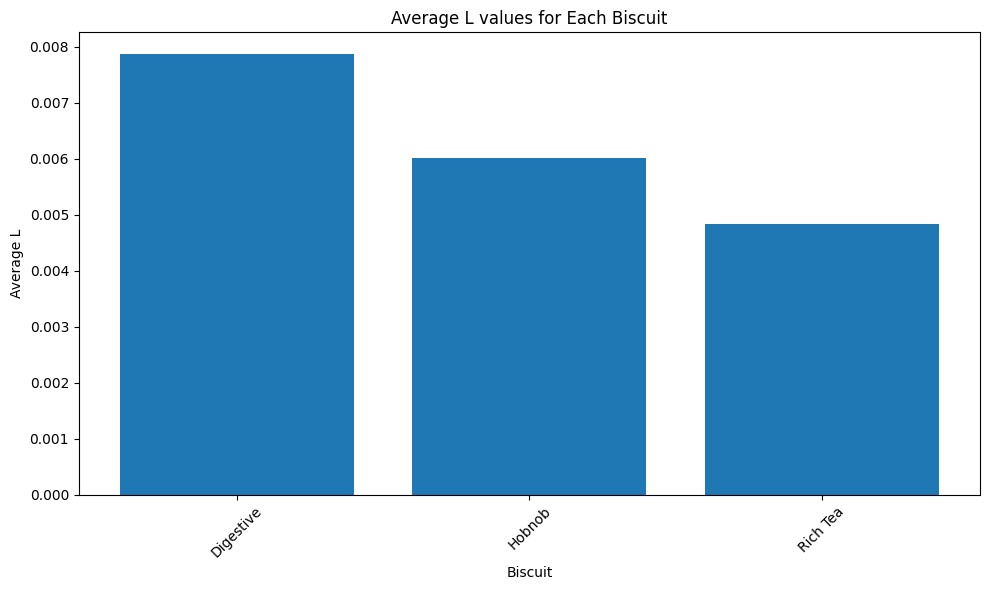

In [107]:
# Calculate the average 'L' for each biscuit
average_L = dunking_data.groupby('biscuit')['L'].mean().reset_index()

# Plotting average L values for each biscuit
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(average_L['biscuit'], average_L['L'])

# Adding labels and title
plt.xlabel('Biscuit')
plt.ylabel('Average L')
plt.title('Average L values for Each Biscuit')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45)

# Showing plot
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

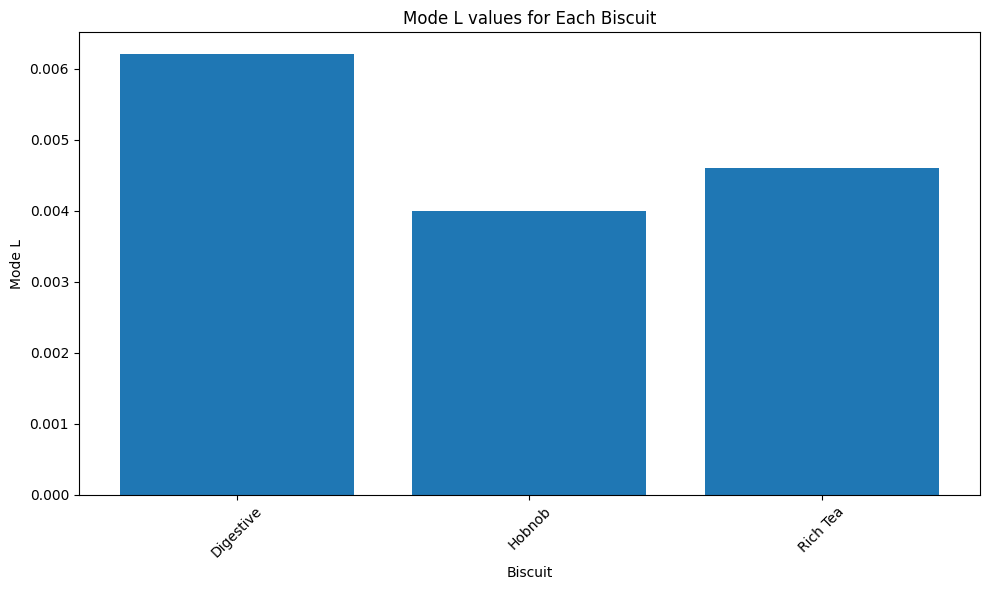

In [108]:
# Calculate the mode 'L' for each biscuit
mode_L = dunking_data.groupby('biscuit')['L'].agg(lambda x: x.mode().iloc[0]).reset_index()

# Plotting mode L values for each biscuit
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(mode_L['biscuit'], mode_L['L'])

# Adding labels and title
plt.xlabel('Biscuit')
plt.ylabel('Mode L')
plt.title('Mode L values for Each Biscuit')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45)

# Showing plot
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


Based on mean and mode, digestive biscuits seem the best to sell for dunking in tea.

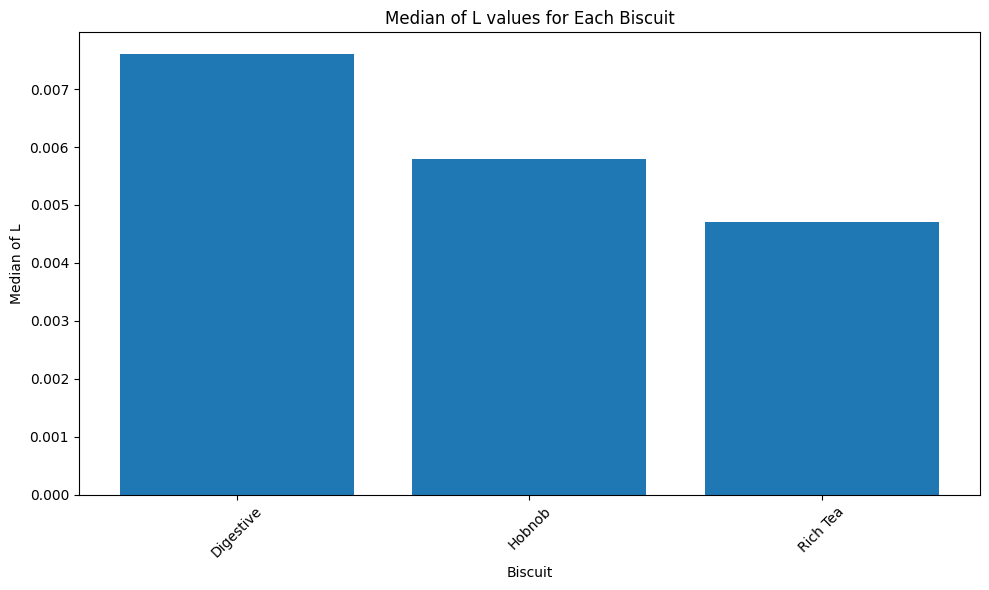

In [109]:
# Calculate the median 'L' for each biscuit
median_L = dunking_data.groupby('biscuit')['L'].median().reset_index()

# Plotting median L values for each biscuit
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(median_L['biscuit'], median_L['L'])

# Adding labels and title
plt.xlabel('Biscuit')
plt.ylabel('Median of L')
plt.title('Median of L values for Each Biscuit')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45)

# Showing plot
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

If we use all 3 metrics, number 1 is digestive biscuits then hobnob and rich tea are the last. This ties in nicely with our p-value based on pore radius, therefore, it seems pore radius might play a significant role in sale of the biscuits. Therefore, the washburn equation can be used to predict sales of dunking biscuits in a way.

let's analyse the biscuit pores

In [110]:
microscopy_data

,gamma,phi,eta,L,t,r,capillary_flow_distance
0,0.084596,1.557367,0.000981,0.003221,24.231107,7.453712e-07,0.003233
1,0.064291,1.538842,0.000998,0.002395,22.169765,2.600680e-07,0.002436
2,0.086224,1.546138,0.001008,0.003036,23.257709,3.734618e-07,0.003027
3,0.082859,1.566878,0.000997,0.001261,12.717432,7.567173e-07,0.001251
4,0.090832,1.570229,0.001002,0.000576,15.189146,8.239067e-07,0.000567
...,...,...,...,...,...,...,...
495,0.077699,1.481847,0.000989,0.006078,21.967531,4.751893e-07,0.006035
496,0.067776,1.488293,0.001011,0.006595,18.163634,8.798032e-07,0.006643
497,0.074166,1.554817,0.000997,0.003041,18.000978,8.652230e-07,0.003042
498,0.081415,1.439910,0.001011,0.009119,19.136713,8.128785e-07,0.009042


let us use our predictor and lable the biscuits in this dataset

In [112]:
X_test

,gamma,phi,eta,t,r
361,0.068707,1.545072,0.001003,15.449822,4.231804e-07
73,0.071645,1.473540,0.000986,23.411752,7.029909e-07
374,0.043428,1.549866,0.001003,22.918782,3.449372e-07
155,0.067121,1.530669,0.000990,27.396695,7.702820e-07
104,0.073537,1.486037,0.001011,22.908011,8.513776e-07
...,...,...,...,...,...
347,0.061064,1.567538,0.000975,20.412868,8.377601e-07
86,0.074890,1.450210,0.000991,20.075460,4.630706e-07
75,0.071460,1.528778,0.001006,28.722636,8.369913e-07
438,0.091558,1.340194,0.000997,29.934807,7.353412e-07


In [117]:
microscopy_data

,gamma,phi,eta,L,t,r,capillary_flow_distance
0,0.084596,1.557367,0.000981,0.003221,24.231107,7.453712e-07,0.003233
1,0.064291,1.538842,0.000998,0.002395,22.169765,2.600680e-07,0.002436
2,0.086224,1.546138,0.001008,0.003036,23.257709,3.734618e-07,0.003027
3,0.082859,1.566878,0.000997,0.001261,12.717432,7.567173e-07,0.001251
4,0.090832,1.570229,0.001002,0.000576,15.189146,8.239067e-07,0.000567
...,...,...,...,...,...,...,...
495,0.077699,1.481847,0.000989,0.006078,21.967531,4.751893e-07,0.006035
496,0.067776,1.488293,0.001011,0.006595,18.163634,8.798032e-07,0.006643
497,0.074166,1.554817,0.000997,0.003041,18.000978,8.652230e-07,0.003042
498,0.081415,1.439910,0.001011,0.009119,19.136713,8.128785e-07,0.009042


In [120]:
biscuit_pred = rf_classifier.predict(microscopy_data[['gamma', 'phi', 'eta', 'L', 't','r']])

In [122]:
microscopy_data['biscuit'] = biscuit_pred

In [123]:
microscopy_data

,gamma,phi,eta,L,t,r,capillary_flow_distance,biscuit
0,0.084596,1.557367,0.000981,0.003221,24.231107,7.453712e-07,0.003233,Digestive
1,0.064291,1.538842,0.000998,0.002395,22.169765,2.600680e-07,0.002436,Rich Tea
2,0.086224,1.546138,0.001008,0.003036,23.257709,3.734618e-07,0.003027,Hobnob
3,0.082859,1.566878,0.000997,0.001261,12.717432,7.567173e-07,0.001251,Digestive
4,0.090832,1.570229,0.001002,0.000576,15.189146,8.239067e-07,0.000567,Digestive
...,...,...,...,...,...,...,...,...
495,0.077699,1.481847,0.000989,0.006078,21.967531,4.751893e-07,0.006035,Hobnob
496,0.067776,1.488293,0.001011,0.006595,18.163634,8.798032e-07,0.006643,Digestive
497,0.074166,1.554817,0.000997,0.003041,18.000978,8.652230e-07,0.003042,Digestive
498,0.081415,1.439910,0.001011,0.009119,19.136713,8.128785e-07,0.009042,Digestive


In [124]:
grouped = microscopy_data.groupby('biscuit')['r'].describe()
grouped

,count,mean,std,min,25%,50%,75%,max
biscuit,,,,,,,,
Digestive,170.0,8.010264e-07,6.193403e-08,5.827038e-07,7.533317e-07,8.061951e-07,8.558677e-07,8.991764e-07
Hobnob,161.0,4.910241e-07,8.476535e-08,2.324710e-07,4.387046e-07,4.916034e-07,5.507217e-07,7.334682e-07
Rich Tea,169.0,3.077720e-07,5.408213e-08,1.562959e-07,2.757486e-07,3.093346e-07,3.377957e-07,4.936485e-07


In [125]:
grouped_1 = merged_data_dL.groupby('biscuit')['r'].describe()
grouped_1

,count,mean,std,min,25%,50%,75%,max
biscuit,,,,,,,,
Digestive,663.0,8.065269e-07,5.963962e-08,6.819558e-07,7.590862e-07,8.094543e-07,8.553077e-07,9.361785e-07
Hobnob,375.0,5.210002e-07,7.093157e-08,3.206130e-07,4.703510e-07,5.236385e-07,5.637163e-07,7.763628e-07
Rich Tea,188.0,3.205167e-07,4.825325e-08,1.634349e-07,2.911082e-07,3.199139e-07,3.564149e-07,4.617529e-07


A count of observations for each type of biscuit indicates how often it occurs; 'Digestive' biscuits are found more often. 'Digestive' biscuits have the biggest average pore radius among all biscuit varieties, followed by 'Hobnob' and 'Rich Tea'. This suggests a tendency towards bigger pores in 'Digestive' biscuits. With 'Hobnob' cookies showing the broadest variety of pore widths, standard deviation emphasises variability. The observed pore size range for each type is indicated by the minimum and maximum values, and the distribution of pore sizes within each biscuit type is revealed by the percentiles.

In [126]:
y_test

361    0.002406
73     0.007518
374    0.001874
155    0.005288
104    0.007634
         ...   
347    0.001324
86     0.006472
75     0.005994
438    0.015198
15     0.009419
Name: L, Length: 100, dtype: float64

In [128]:
len(test_washburn)

100

In [129]:
X_test['r']

361    4.231804e-07
73     7.029909e-07
374    3.449372e-07
155    7.702820e-07
104    8.513776e-07
           ...     
347    8.377601e-07
86     4.630706e-07
75     8.369913e-07
438    7.353412e-07
15     5.116597e-07
Name: r, Length: 100, dtype: float64

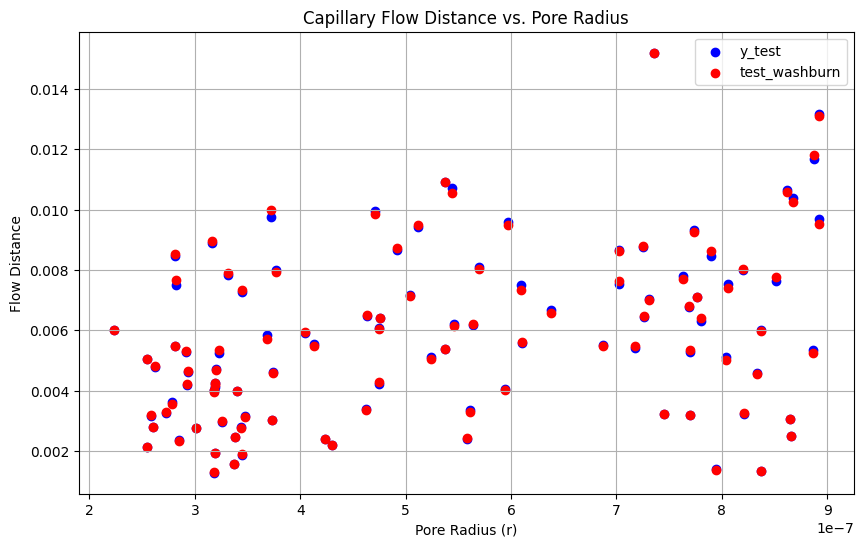

In [130]:
# Plotting
plt.figure(figsize=(10, 6))

# Plotting y_test
plt.scatter(X_test['r'], y_test, color='blue', label='y_test')

# Plotting test_washburn
plt.scatter(X_test['r'], test_washburn, color='red', label='test_washburn')

# Adding labels and title
plt.xlabel('Pore Radius (r)')
plt.ylabel('Flow Distance')
plt.title('Capillary Flow Distance vs. Pore Radius')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

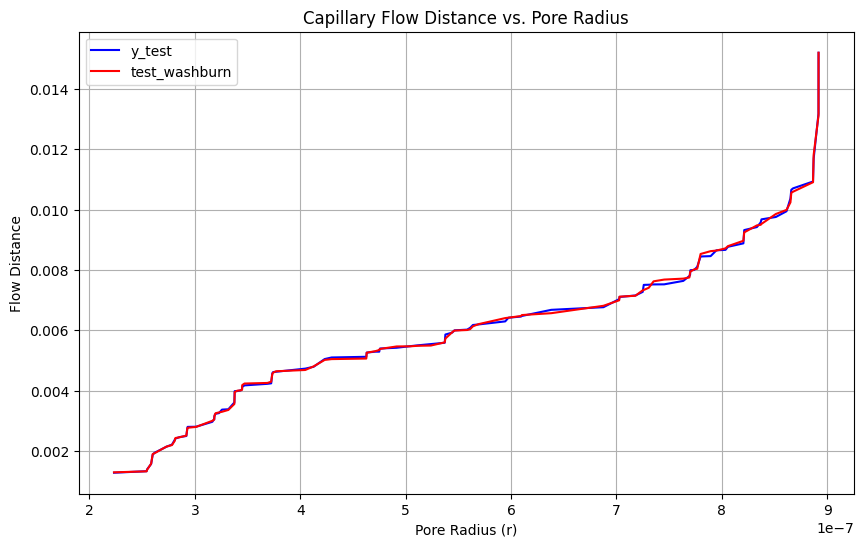

In [132]:
# Plotting
plt.figure(figsize=(10, 6))

# Plotting y_test as a line
plt.plot(sorted(X_test['r']), sorted(y_test), color='blue', label='y_test')

# Plotting test_washburn as a line
plt.plot(sorted(X_test['r']), sorted(test_washburn), color='red', label='test_washburn')

# Adding labels and title
plt.xlabel('Pore Radius (r)')
plt.ylabel('Flow Distance')
plt.title('Capillary Flow Distance vs. Pore Radius')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

The wahsburn equation seems to work pretty well. I don't feel the need to optimise it

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


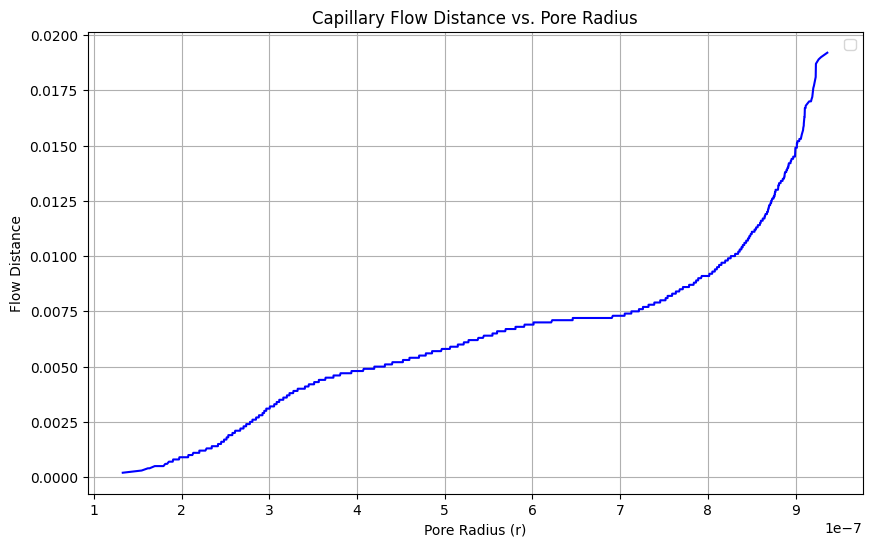

In [139]:
# Plotting
plt.figure(figsize=(10, 6))

# Plotting y_test as a line
plt.plot(sorted(dunking_data['r']), sorted(dunking_data['L']), color='blue')

# Adding labels and title
plt.xlabel('Pore Radius (r)')
plt.ylabel('Flow Distance')
plt.title('Capillary Flow Distance vs. Pore Radius')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()